<a href="https://colab.research.google.com/github/shubham9875/EDAProjectFinal/blob/main/EDAProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pf=pd.read_csv("train 2.csv")

In [ ]:
pf.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [ ]:
pf.shape

(550068, 12)

In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


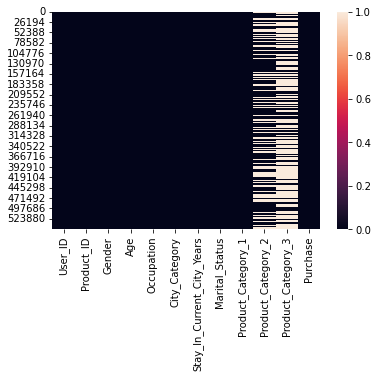

In [ ]:
sns.heatmap(pf.isnull())
plt.show()

### droping product_category_3 as it has a lot of null values


In [ ]:
pf.drop(["Product_Category_3"],axis=1,inplace=True)

In [ ]:
pf.drop(["User_ID"],axis=1,inplace=True)

In [ ]:
pf.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,1422


<AxesSubplot:ylabel='Gender'>

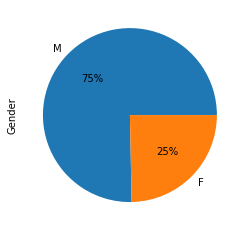

In [ ]:
pf.Gender.value_counts().plot(kind='pie',autopct='%.f%%')


### male shop 3 times more than females

<AxesSubplot:>

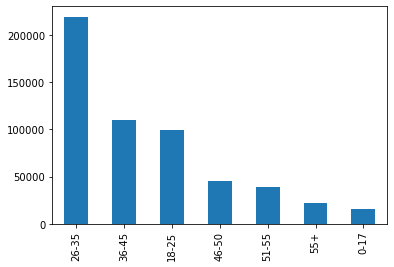

In [ ]:
pf.Age.value_counts().plot(kind='bar')

In [ ]:
pf.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

Age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: Product_Category_2, dtype: float64

<AxesSubplot:xlabel='Gender,Marital_Status'>

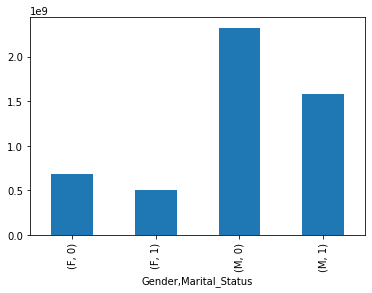

In [ ]:
pf.groupby(['Gender','Marital_Status'])['Purchase'].sum().plot(kind='bar')

In [ ]:
print("sbcashfsjncjsjcnsijcsancsncscj")

sbcashfsjncjsjcnsijcsancsncscj
